# Support Vector Machines

![](https://jeremykun.files.wordpress.com/2017/06/svm_solve_by_hand-e1496076457793.gif?w=372)

Para entender um o conceito e um pouco da teoria, assista o seguinte vídeo:

* [Support Vector Machines, Clearly Explained!!!](https://www.youtube.com/watch?v=efR1C6CvhmE&t=787s)

E leia:

* [1.4. Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification)

O algoritmo:

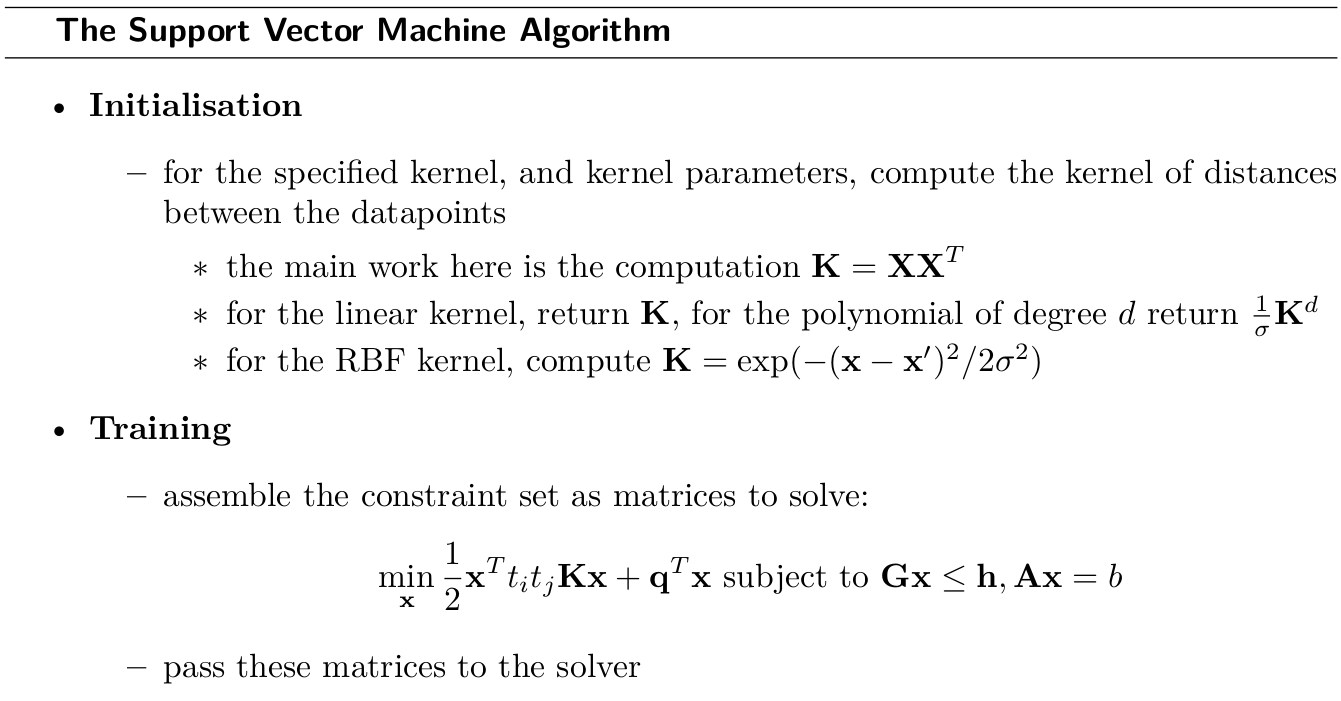

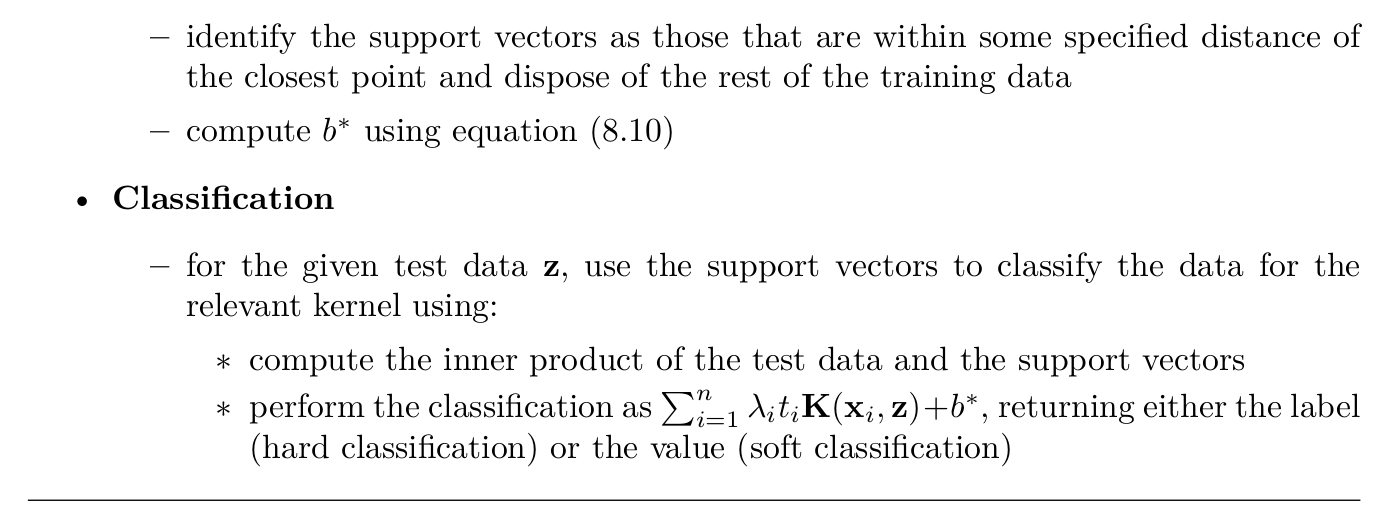

A equação 8.10 mencionada é:
    
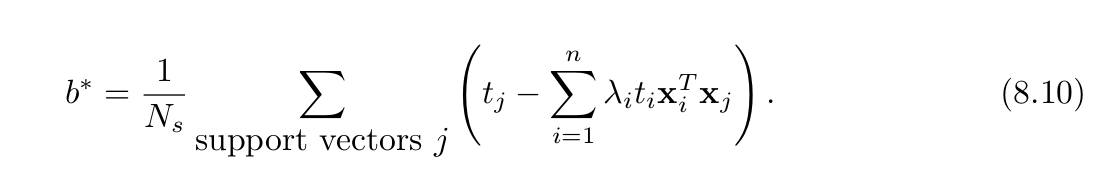

## Gráfico de diferentes classificadores SVM aplicados no dataset Íris

Reprodução do exemplo retirado [daqui](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

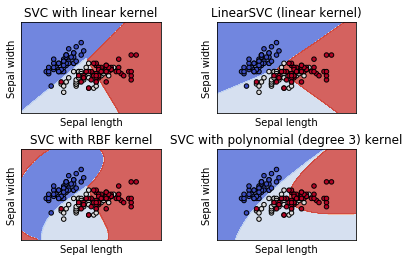

In [3]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Como Escolher o Kernel e seus respectivos hiperparâmetros?


Parafraseando um trecho do livro [Machine Learning: An Algorithmic Perspective](https://www.amazon.com/Machine-Learning-Algorithmic-Perspective-Recognition/dp/1420067184) na página 178:

*"Choosing which kernel to use and the parameters in these kernels is a tricky problem.
While there is some theory based on something known as the Vapnik–Chernik dimension that
can be applied, most people just experiment with different values and find one that works,
using a validation set as we did for the MLP in Chapter 4."*

Tradução mais que livre do Cloves

*"Escolher qual kernel usar e seus respectivos parâmetros é algo trick. Mesmo havendo
alguns trabalhos teóricos, como as [Dimensões de Vapnik-Chernik](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_dimension), que podem ser usadas para 
esse propósito, a maioria das pessoas experimentam usar diferentes kernels e hiperparâmetros para 
encontrar aquele que funciona melhor para o problema em questão, usando tecnicas de validação."*